# Klusterointi

## Teoriaosuuden sisältö
* Ohjattu koneoppiminen vs ohjaamaton koneoppiminen
* Etäisyyden käsite
* Klusterointityypit
    - Hierarkinen klusterointi
    - Osittava klusterointi

Klusterointi on ohjaamattoman koneoppimisen menetelmä. Erona ohjattuun koneoppimiseen ohjaamattoman koneoppimisen tapauksessa datapisteille ei ole luokkia ja menetelmän tarkoitus onkin havaita datassa samankaltaisuutta ja hahmoja (patterns). 

## Etäisyys
Klusteroinnin tavoite onkin ryhmitellä joukko datapisteitä ryhmiin niiden samankaltaisuuden perusteella. Klusteroinnin kannalta tärkeä käsite onkin samankaltaisuus, eli **etäisyys**. Suurimmalle osalle tutuin on varmasti Euklidinen etäisyys eli dist=$\sqrt{\sum_{i=1}^n(x_1-x_2)^2}$, joka mittaa kahden pisteen etäisyyttä n-ulotteisessa avaruudessa.

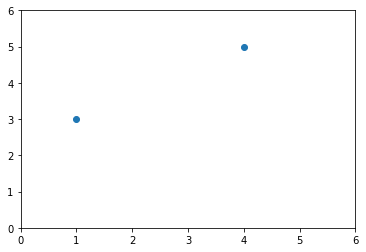

In [24]:
first_point=(1,3)
second_point=(4,5)

from matplotlib import pyplot as plt
import scipy as sp
from sklearn.metrics.pairwise import euclidean_distances

x, y=np.array([first_point,second_point]).T
plt.axis([0, 6, 0, 6])
plt.scatter(x, y)

In [26]:
sp.spatial.distance.euclidean(first_point, second_point)

3.605551275463989

Euklidisen etäisyyksien lisäksi on myös monia muita tapoja mitata numeeristen arvojen etäisyyttä toisistaan, esimerkiksi:
* Manhattan etäisyys
* Kosini samankaltaiuus

Etäisyys on helppo ymmärtää, kun kyse on numeerisista muuttujista, mutta mitä jos halutaan laskea kuvien etäisyys toisistaan, tai sanojen? Miten esimerkiksi mittaisit seuraavien kuvien etäisyyttä toisistaan?

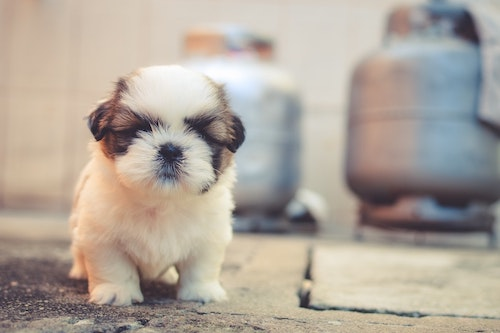

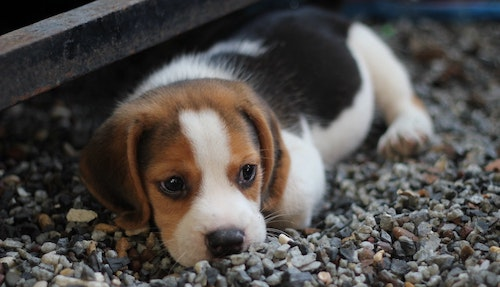

Entäpä miten mittaisit seuraavien lauseiden etäisyyden?

"Maanantai on kamala päivä Karvisen mielestä."
"Tiistai on kamala päivä Karvisen mielestä!"

## Klusterointitavat

Klusterointia voidaan tehdä monin eri tavoin. Yksinkertaisimmat klusterointimallit ovat hierarkiset mallit, centroid-perustaiset mallit ja verkkoperustaiset mallit. 

**Hierarkisen mallin** tapauksessa datapisteistä pyritään muodostamaan hierarkia, joka määräytyy pisteiden samankaltaisuuden tai erilaisuuden perusteella. Etäisyyden mitan valitsemisen lisäksi valitaan *yhdistämisehto*. Kaksi klusteria voidaan yhdistää niiden kauimpina olevien datapisteiden perusteella, tai lähimpien datapisteiden perusteella. 

Esimerkiksi:
Alla on etäisyysmatriisi, joka kuvaa pisteiden a, b, c ja d etäisyyttä toisiinsa. 

|   | a   | b     | c     | d    
|---|  --- | :---: | :---: | ---: 
| a | 0   | 2     | 5     | 19   
| b | 2 | 0 | 7 | 15
|c  | 5| 7|0|1
|d  | 19 | 15 | 1 | 0

Koska pisteet c ja d ovat lähimpänä toisiaan, yhdistetään ne. Lasketaan sitten klusterin etäisyys jäljellä oleviin pisteisiin.

$max(D(c, a), D(d, a))=max(5, 19)=19$
 
$max(D(b, c), D(b, d))=max(7, 15)=15$


ja saadaan uusi etäisyysmatriisi:

|   | a   | b   | (c, d) 
|--- | :---: | :---: | ---:
|a  | 0   | 2   | 19 
|b  | 2   | 0   | 15 
|(c, d)  | 19  | 15  | 0

Tässä lyhin etäisyys on a:n ja b:n välillä, joten niistä tulee toinen klusteri. Voidaan laskea vielä (a,b) ja (c,d) klusterien etäisyys toisistaan:

$max(D(a(c,d)), D(b(c,d)))=max(19, 15)=19$

eli lopullinen klusteri on ((a,b),(c,d))

## Osittava klusterointi

Osittavalla klusteroinnilla tarkoitetaan klusterointia, jossa yritetään optimoida jokin mitta, esimerkiksi etäisyyden neliö. Usein osittavassa klusteroinnissa määritellään etukäteen, kuinka monta klusteria lopuksi halutaan.

Esimerkkejä osittavasta klusteroinnista ovat k-keskiarvot (k-means), k-medoidit (k-medoids) ja k-mediaanit (k-medians). Ne kaikki ovat samankaltaisia, mutta yrittävät optimoida eri mittaa.

### K-keskiarvot

K-keskiarvot -algoritmissa valitaan ensin kuinka monta klusteria halutaan, eli k:n arvo ja valitaan k pistettä tai jaetaan datapisteet k:hen ryhmään satunnaisesti. Tämän jälkeen k-keskiarvot -algoritmissa toistetaan kahta vaihetta:
1. Valitse kaikille datapisteille klusteri sen perusteella, mikä niiden neliöllinen etäisyys on nykyisistä keskiarvoista ja
2. laske uudet klusterien keskiarvot

**TODO:** Jatka tähän esimerkkiä k-meansista. Sekä visuaalinen/tekstuaalinen esimerkki että koodiesimerkki.